C:\Users\soumy\AppData\Local\Temp\ipykernel_28500\1962337199.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stocks, start="2018-01-01", end="2023-01-01")
[*********************100%***********************]  4 of 4 completed


MultiIndex([( 'Close',  'AAPL'),
            ( 'Close',  'AMZN'),
            ( 'Close', 'GOOGL'),
            ( 'Close',  'MSFT'),
            (  'High',  'AAPL'),
            (  'High',  'AMZN'),
            (  'High', 'GOOGL'),
            (  'High',  'MSFT'),
            (   'Low',  'AAPL'),
            (   'Low',  'AMZN'),
            (   'Low', 'GOOGL'),
            (   'Low',  'MSFT'),
            (  'Open',  'AAPL'),
            (  'Open',  'AMZN'),
            (  'Open', 'GOOGL'),
            (  'Open',  'MSFT'),
            ('Volume',  'AAPL'),
            ('Volume',  'AMZN'),
            ('Volume', 'GOOGL'),
            ('Volume',  'MSFT')],
           names=['Price', 'Ticker'])


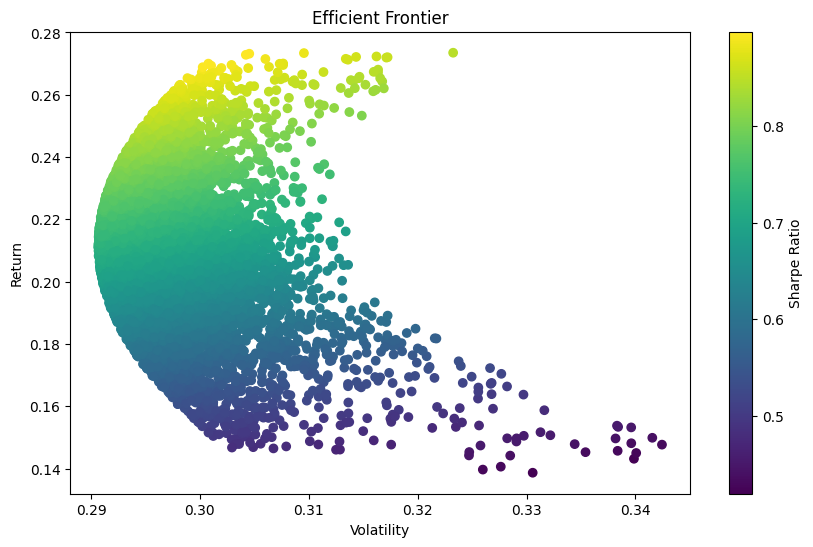

In [2]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Download data for multiple stocks
stocks = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']
data = yf.download(stocks, start="2018-01-01", end="2023-01-01")

# Print columns to verify structure
print(data.columns)

# Extract 'Adj Close' prices properly
# For multi-index columns, 'Adj Close' is level=0 (first level)
adj_close = data['Close']  # ✅ This is correct

# Calculate daily returns
returns = adj_close.pct_change().dropna()

# Simulate random portfolios
num_portfolios = 10000
ret_arr = []
vol_arr = []
sharpe_arr = []

for _ in range(num_portfolios):
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)

    ret = np.sum(returns.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    sharpe = ret / vol

    ret_arr.append(ret)
    vol_arr.append(vol)
    sharpe_arr.append(sharpe)

# Plot Efficient Frontier
plt.figure(figsize=(10, 6))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.show()


In [2]:
import yfinance as yf

df = yf.download("AAPL", start="2020-01-01", end="2021-01-01")
print(df.head())


C:\Users\soumy\AppData\Local\Temp\ipykernel_9988\4085178657.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2020-01-01", end="2021-01-01")
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.620834  72.681281  71.373211  71.627084  135480400
2020-01-03  71.914810  72.676439  71.689950  71.847110  146322800
2020-01-06  72.487839  72.526526  70.783241  71.034702  118387200
2020-01-07  72.146927  72.753808  71.926900  72.497514  108872000
2020-01-08  73.307510  73.609745  71.849533  71.849533  132079200
